In [21]:
%load_ext pycodestyle_magic
%pycodestyle_on
%matplotlib inline

import numpy as np

from time import time
from matplotlib import pyplot as plt

import zhu_draw as zd
import zhu_contour as zc
import zhu_symmetry as zs

In [79]:
import imp
for m in [zc, zd, zs]:
    imp.reload(m)

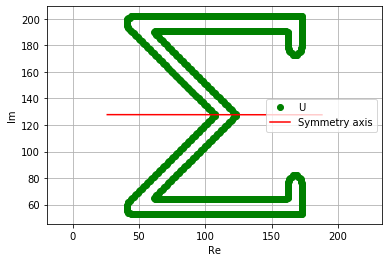

In [72]:
path = "data/truesym_examples/sigma.bmp"
for u in zc.get_contours(path):
    q, (p, v) = zs.find_sym(u)
    zd.draw_contour('plt', u, p, v)
    plt.show()

2
1 5


TypeError: 'AxesSubplot' object does not support indexing

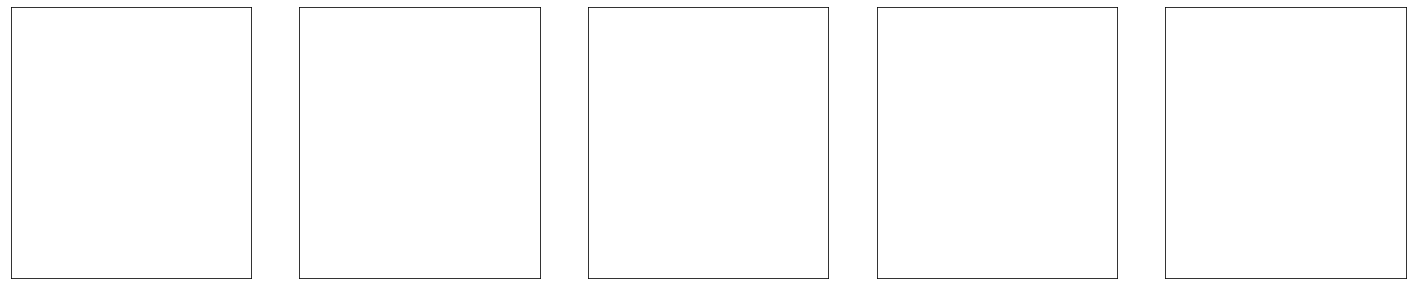

In [80]:
folders = [
    'data/multisym',
    'data/to_visapp/planes',
    'data/to_visapp/many',
    'data/butterfly'
]

for folder in folders[:1]:
    zd.subploter(zs.get_drawing_args(folder, True, True))
    zd.savefig(folder.split('/')[-1]+'_from_txt', fmt='png')
    plt.show()